**Importing Libraries**
1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats

In [2]:
warnings.filterwarnings('ignore')
import os

**Loading Data in DataFrame**
2. Read the data as a data frame using pandas

In [3]:
data = pd.read_csv("/content/preprocessed_data.csv")
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0
5,29,0,2,6,0,0,0,0,1,4,256,2,1,0
6,26,8,2,2,0,0,0,1,1,4,449,1,1,1
7,30,1,1,0,0,1,0,0,7,4,126,2,1,0
8,50,1,1,0,0,0,0,1,6,0,550,1,1,0
9,33,0,2,3,0,1,0,0,3,3,498,5,1,0


**Shape of the data**

In [4]:
data.shape

(32950, 14)

**Data type of each attribute**

In [5]:
data.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
housing        int64
loan           int64
contact        int64
month          int64
day_of_week    int64
duration       int64
campaign       int64
poutcome       int64
y              int64
dtype: object

**Data Information**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          32950 non-null  int64
 1   job          32950 non-null  int64
 2   marital      32950 non-null  int64
 3   education    32950 non-null  int64
 4   default      32950 non-null  int64
 5   housing      32950 non-null  int64
 6   loan         32950 non-null  int64
 7   contact      32950 non-null  int64
 8   month        32950 non-null  int64
 9   day_of_week  32950 non-null  int64
 10  duration     32950 non-null  int64
 11  campaign     32950 non-null  int64
 12  poutcome     32950 non-null  int64
 13  y            32950 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [7]:
data.nunique()

age             30
job             11
marital          3
education        7
default          2
housing          2
loan             2
contact          2
month           10
day_of_week      5
duration       515
campaign         5
poutcome         3
y                2
dtype: int64

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32950.0,39.605584,9.079007,26.0,32.0,38.0,47.0,55.0
job,32950.0,3.634901,3.548829,0.0,0.0,2.0,7.0,10.0
marital,32950.0,1.169408,0.603146,0.0,1.0,1.0,2.0,2.0
education,32950.0,3.706434,2.081246,0.0,2.0,3.0,6.0,6.0
default,32950.0,0.000091,0.009542,0.0,0.0,0.0,0.0,1.0
housing,32950.0,0.547800,0.497717,0.0,0.0,1.0,1.0,1.0
loan,32950.0,0.152443,0.359455,0.0,0.0,0.0,0.0,1.0
contact,32950.0,0.365463,0.481567,0.0,0.0,0.0,1.0,1.0
month,32950.0,4.233414,2.319693,0.0,3.0,4.0,6.0,9.0
day_of_week,32950.0,2.000546,1.400260,0.0,1.0,2.0,3.0,4.0


**Null Values**

In [10]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
y              0
dtype: int64

In [11]:
data.isnull().values.any()

False

In [12]:
data['y'].value_counts()

y
0    29238
1     3712
Name: count, dtype: int64

**Pie Chart**

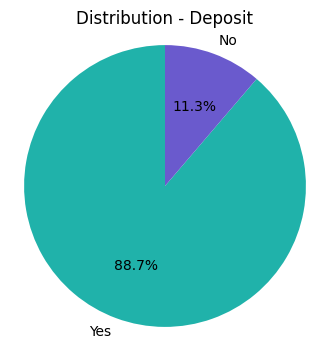

In [13]:
y_counts = data['y'].value_counts()
y_counts.columns = ['Yes', 'No']
plt.figure(figsize=(4, 4))
pie=plt.pie(y_counts, labels=y_counts.columns, autopct='%1.1f%%',startangle=90,colors=['LightSeaGreen', 'SlateBlue'])
plt.axis('equal')
plt.title("Distribution - Deposit")
plt.show()


**Histogram**

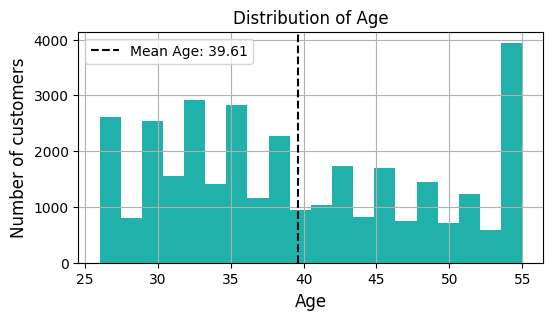

In [14]:
plt.figure(figsize=(6,3))
data['age'].hist(bins=20, color='LightSeaGreen')
mean_age = data['age'].mean()
plt.axvline(x=mean_age, color='black', linestyle="--", label='Mean Age: {:.2f}'.format(mean_age))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.legend()
plt.title('Distribution of Age')
plt.show()

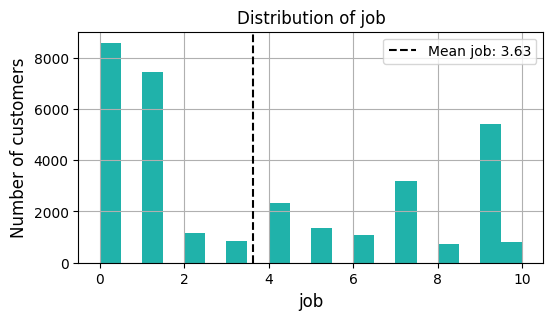

In [15]:
plt.figure(figsize=(6,3))
data['job'].hist(bins=20, color='LightSeaGreen')
mean_job = data['job'].mean()
plt.axvline(x=mean_job, color='black', linestyle="--", label='Mean job: {:.2f}'.format(mean_job))
plt.xlabel('job', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.legend()
plt.title('Distribution of job')
plt.show()

**Box Plot**

<Axes: ylabel='age'>

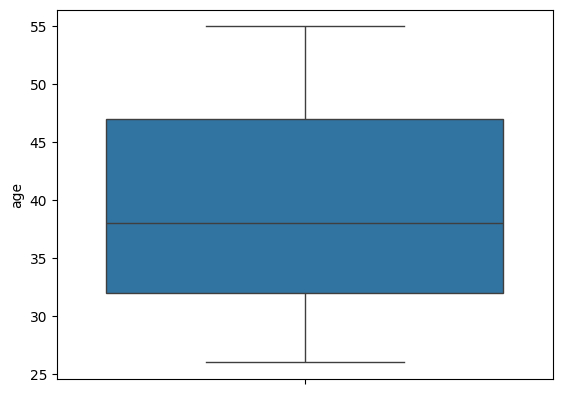

In [16]:
sns.boxplot(data['age'])

<Axes: ylabel='job'>

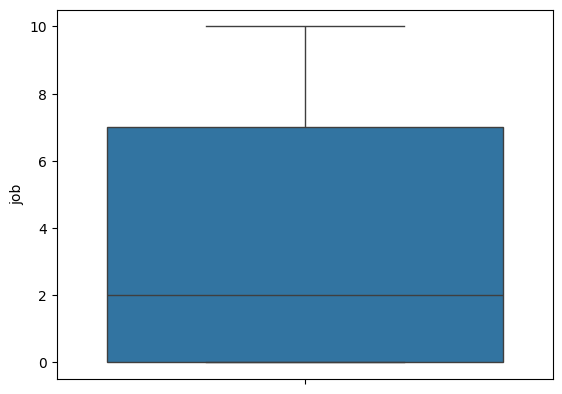

In [17]:
sns.boxplot(data['job'])

<Axes: ylabel='education'>

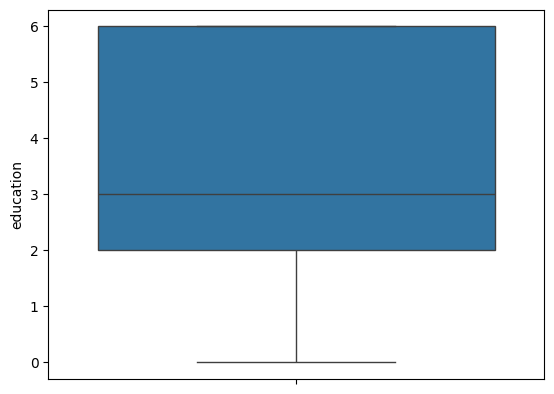

In [18]:
sns.boxplot(data['education'])

**Distribution Plot**

<Axes: xlabel='age', ylabel='Density'>

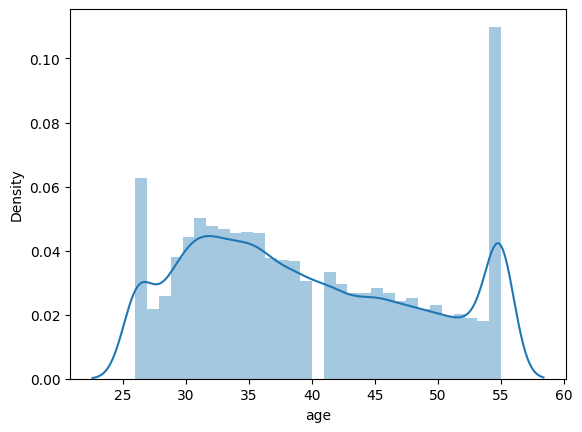

In [19]:
sns.distplot(data['age'])

<Axes: xlabel='job', ylabel='Density'>

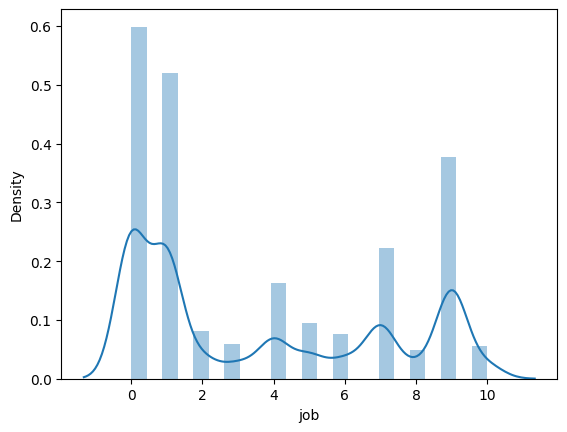

In [20]:
sns.distplot(data['job'])

<Axes: xlabel='education', ylabel='Density'>

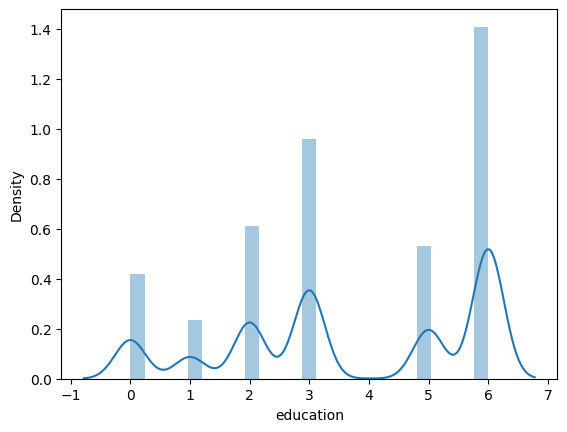

In [21]:
sns.distplot(data['education'])

**Heat Map**

<Axes: >

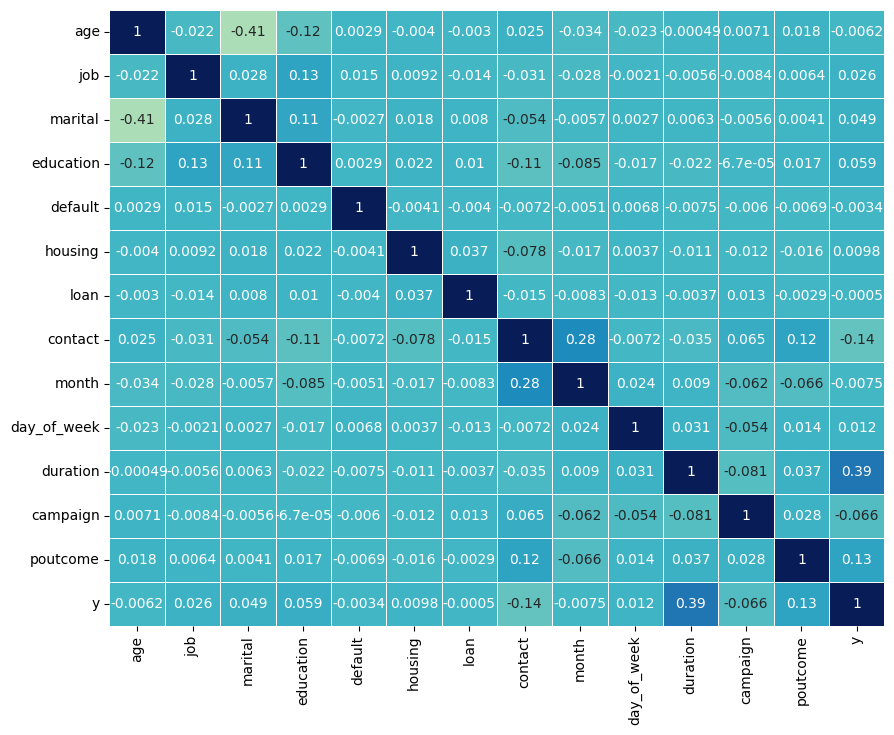

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

*** Count Plot***

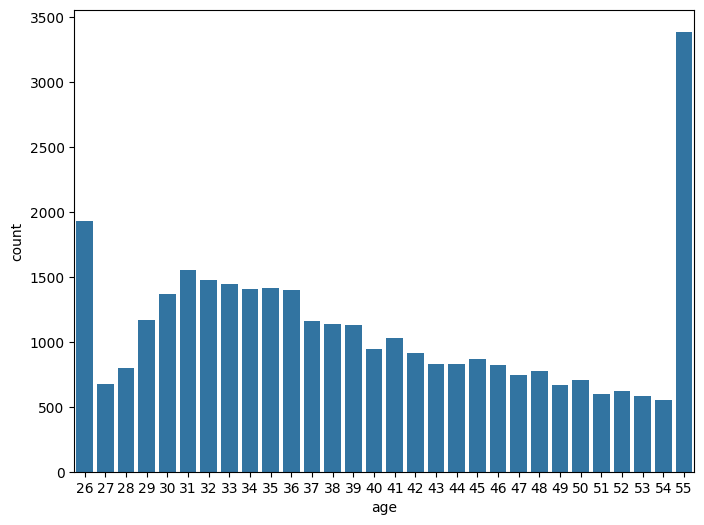

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='age',data=data)
plt.show()

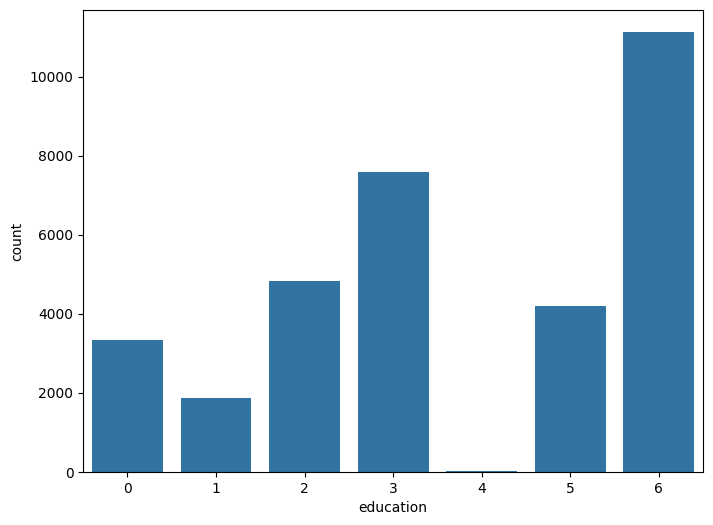

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='education',data=data)
plt.show()

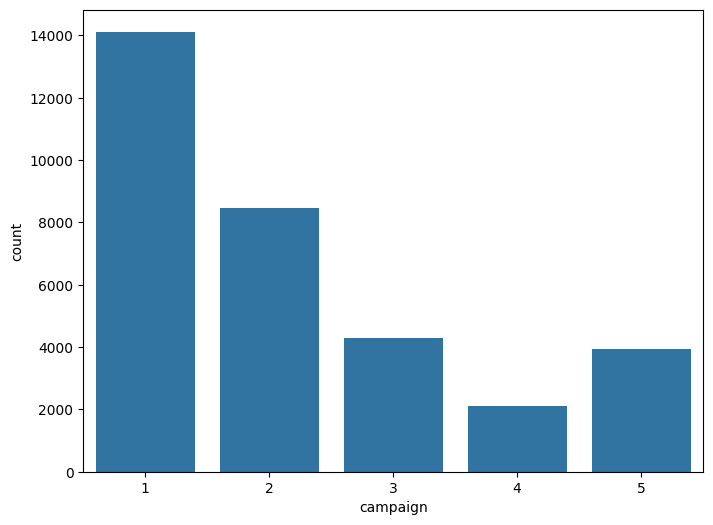

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='campaign',data=data)
plt.show()

We observed that the most clients participated in the first few campaigns and it is showing a decreasing trend. As the number of campaigns held increases

**Bar Plot**

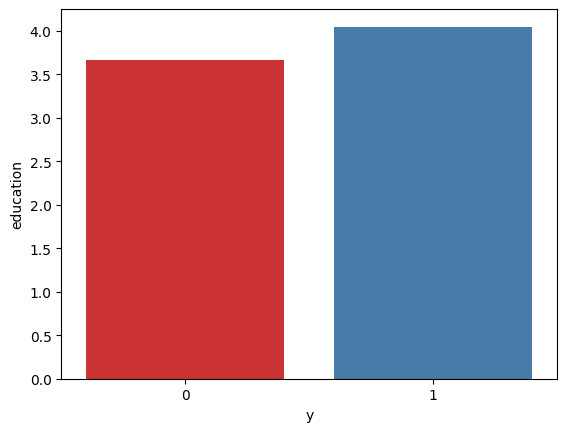

In [26]:
sns.barplot(x=data.y,y=data.education,errorbar=None,palette='Set1')
plt.show()

In [27]:
X = data.values[:,0:-1]
Y = data.values[:,-1]

 It assigns the selected values to the variable X. This typically means that you're extracting the feature variables from your DataFrame, where each row represents a sample, and each column (except the last one) represents a feature.

It assigns the selected values to the variable Y. This typically means that you're extracting the target variable from your DataFrame, where each value in the last column represents the target or label associated with each sample.

In [28]:
print(X.shape)
print(Y.shape)

(32950, 13)
(32950,)


X.shape: This prints the shape of the feature matrix X, where:
The number of rows represents the number of samples or instances in the dataset.

y.shape: This prints the shape of the target vector y, where
The length of the vector is equal to the number of samples in the dataset.

**Split data into train/test**

In [29]:
# splitting the data
from sklearn.model_selection import train_test_split

#split the data into training = 80% and testing = 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [30]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(26360, 13)
(26360,)
(6590, 13)
(6590,)


**Models**

In [31]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Train the classifier
gb_classifier.fit(X_train, Y_train)

# Predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate metrics
conf_matrix = confusion_matrix(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9057663125948406
Confusion Matrix:
[[5704  163]
 [ 458  265]]
Precision: 0.892045249132231
Recall: 0.9057663125948406
F1 Score: 0.8948458153942935


In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier()

# Train the classifier
adaboost_clf.fit(X_train, Y_train)

# Predictions on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate metrics
conf_matrix = confusion_matrix(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9019726858877086
Confusion Matrix:
[[5685  182]
 [ 464  259]]
Precision: 0.8875415182504854
Recall: 0.9019726858877086
F1 Score: 0.8912485304233686


In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgboost_clf = XGBClassifier()

# Train the classifier
xgboost_clf.fit(X_train, Y_train)

# Predictions on the test set
y_pred = xgboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate metrics
conf_matrix = confusion_matrix(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8998482549317147
Confusion Matrix:
[[5619  248]
 [ 412  311]]
Precision: 0.8905075798984801
Recall: 0.8998482549317147
F1 Score: 0.8941325303534754
